#### Navie Bayes classifier

Application:

1 - Spam filtering

2 - Text classification

3 - Sentiment analysis

4 - Recommender systems


In [297]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [298]:
df = pd.read_csv('datasets/adult.csv',header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [299]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [301]:
catergorical = [var for var in df.columns if df[var].dtype == object]
df[catergorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [302]:
df[catergorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [303]:
for var in catergorical:
    df[var].replace(' ?',np.NaN,inplace=True)

In [304]:
df[catergorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [305]:
numerical = [var for var in df.columns if df[var].dtype == int]

In [306]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [307]:
X = df.drop(['income'],axis = 1)
y = df['income']

In [308]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.3,random_state= 0)

X_train.shape,X_test.shape



((22792, 14), (9769, 14))

In [309]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

/Users/perciva1/opt/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [310]:
df['native_country'].replace(' ?',np.NaN,inplace=True)


In [311]:
X_train.shape,X_test.shape

((22792, 14), (9769, 14))

In [312]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [313]:
catergorical = [col for col in X_train.columns if X_train[col].dtypes == object]
catergorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [314]:
numerical = [col for col in X_train.columns if X_train[col].dtypes == int]

In [315]:
X_train[catergorical].isnull().mean()

workclass         0.0
education         0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
native_country    0.0
dtype: float64

In [316]:
X_train[catergorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [317]:
import category_encoders as ce

In [318]:
encoder = ce.OneHotEncoder(cols = catergorical)
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [319]:
X_train.shape

(22792, 105)

In [324]:
X_test['native_country_41'] = 0

In [325]:
cols = X_train.columns

In [326]:
from sklearn.preprocessing import RobustScaler
scaler  = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



In [327]:
X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])


In [328]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [330]:
y_pred = gnb.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [334]:
from sklearn.metrics import accuracy_score
print('Model accuracy score : {0:2f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.795987


In [335]:
#Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))


Training set score: 0.8067
Test set score: 0.7960


In [336]:
y_test.value_counts()

 <=50K    7407
 >50K     2362
Name: income, dtype: int64

Confusion matrix 

 [[7082  325]
 [1668  694]]


<AxesSubplot:>

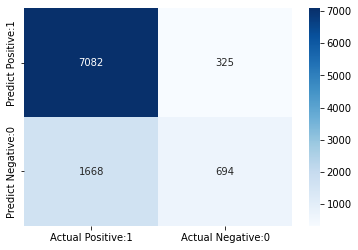

In [343]:
# confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix \n\n', cm)

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data = cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot= True, fmt = 'd', cmap = 'Blues')

In [344]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.96      0.88      7407
        >50K       0.68      0.29      0.41      2362

    accuracy                           0.80      9769
   macro avg       0.75      0.62      0.64      9769
weighted avg       0.78      0.80      0.76      9769

